In [1]:
library(faraway)
library(car)
library(MASS)
library(lmtest)
library(tidyverse)
library(nlme)

Loading required package: carData


Attaching package: ‘car’


The following objects are masked from ‘package:faraway’:

    logit, vif


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


── Attaching packages ───────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ dplyr::select() masks MASS::select()
✖ purrr::some()   masks car::some()


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse




In [2]:
df_commercial <- read_table("commercial_property.txt")


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  rental_rates = col_double(),
  age = col_double(),
  opp_expenses = col_double(),
  vac_rates = col_double(),
  tot_squft = col_double()
)



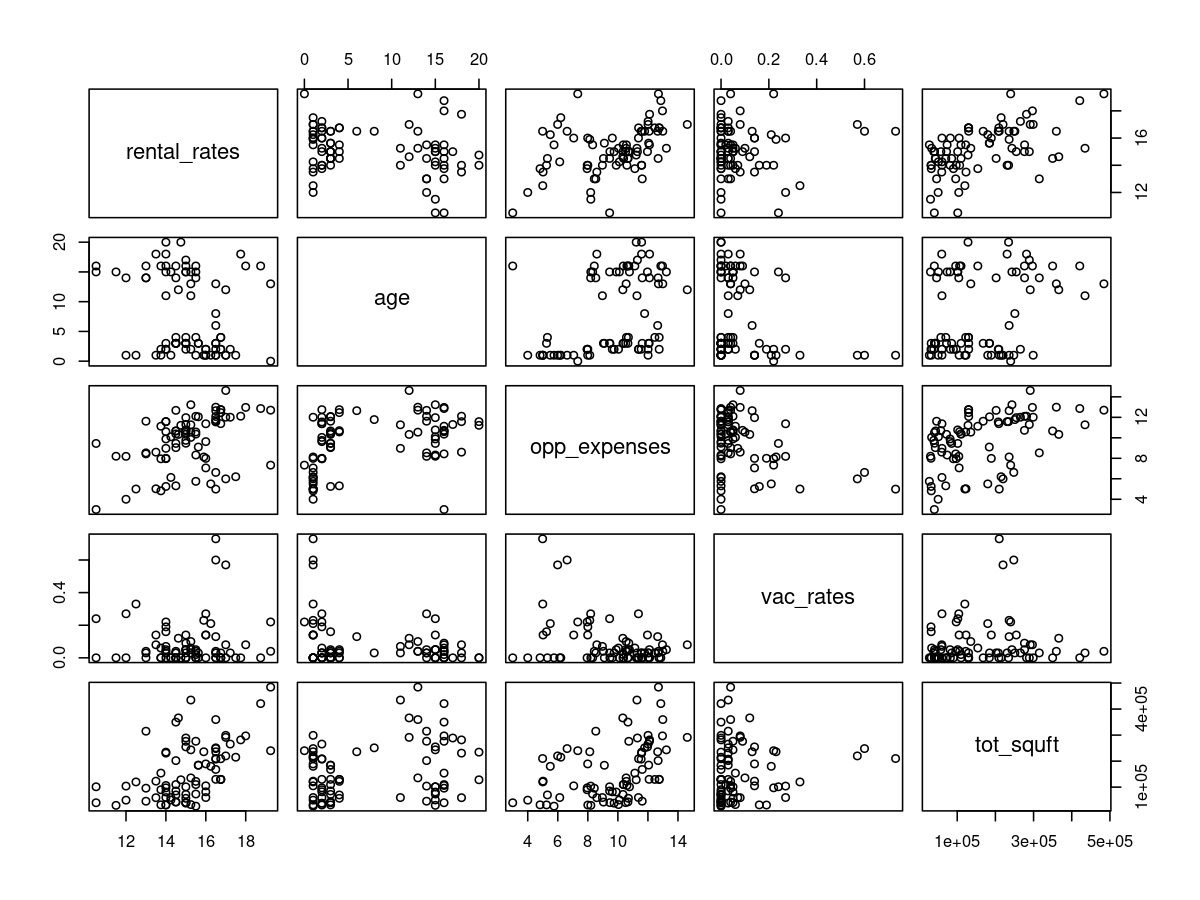

In [3]:
#a)
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 150)
df_commercial %>% pairs()

The only pair of variables that show a relationship is between tot_sqft and rental_rates which displays a slight linear relationship. The other pairs do not show strong relationship, linear or otherwise.

In [4]:
#b)
cor(df_commercial)

,rental_rates,age,opp_expenses,vac_rates,tot_squft
rental_rates,1.00000000,-0.2502846,0.4137872,0.06652647,0.53526237
age,-0.25028456,1.0000000,0.3888264,-0.25266347,0.28858350
opp_expenses,0.41378716,0.3888264,1.0000000,-0.37976174,0.44069713
vac_rates,0.06652647,-0.2526635,-0.3797617,1.00000000,0.08061073
tot_squft,0.53526237,0.2885835,0.4406971,0.08061073,1.00000000


The strongest positive correlation is the one between tot_sqft and rental_rates. The strongest negative is the one between opp_expenses and vac_rates. In both of those cases, the relationship was moderate. Age showed a moderate negative ralation with rental_rates and vac_rates. It also had a moderate positive relationship with tot_squft and opp_expenses. Overall, the only two pairs that did not indicate a significant relationship is vac_rates/rental_rates and vac_rates/tot_squft. 

In [5]:
#c)
comm_model1 <- lm(rental_rates ~ ., data = df_commercial)
summary(comm_model1)


Call:
lm(formula = rental_rates ~ ., data = df_commercial)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1872 -0.5911 -0.0910  0.5579  2.9441 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.220e+01  5.780e-01  21.110  < 2e-16 ***
age          -1.420e-01  2.134e-02  -6.655 3.89e-09 ***
opp_expenses  2.820e-01  6.317e-02   4.464 2.75e-05 ***
vac_rates     6.193e-01  1.087e+00   0.570     0.57    
tot_squft     7.924e-06  1.385e-06   5.722 1.98e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.137 on 76 degrees of freedom
Multiple R-squared:  0.5847,	Adjusted R-squared:  0.5629 
F-statistic: 26.76 on 4 and 76 DF,  p-value: 7.272e-14


In [6]:
comm_model1$coefficients

(Intercept)           age  opp_expenses     vac_rates     tot_squft 
 1.220059e+01 -1.420336e-01  2.820165e-01  6.193435e-01  7.924302e-06

**c. part a)**  
y = 12.2 - 0.142 $x_1$ + 0.282 $x_2$ + 0.620 $x_3$ + 0.000000792 $x_4$  
where:  
$x_1$ -> age of dwelling (age)  
$x_2$ -> operating expenses and taxes (opp_expenses)  
$x_3$ -> vacancy rates (vac_rates)  
$x_4$ -> total square footage (tot_squft) 

The predictor with seemingly the smallest effect on rental rates is total square footage as can be seen by the near zero value, but it is still statistically significant. The small coefficient value is offset by the large values of the predictor itself. Vacancy rates were the least statistically significant predictor as can be seen with the low p value. If this predictor is dropped from the model, the model prediction will still produce a reasonably accurate result. Age and operating expenses were both statisitically significant to the model and produced a large effect on the resulting prediction.

In [7]:
sprintf("The R squared values is %.3f", summary(comm_model1)$r.squared)
sprintf("The adjusted R squared values is %.3f", summary(comm_model1)$adj.r.squared)

[1] "The R squared values is 0.585"

[1] "The adjusted R squared values is 0.563"

c. part d)
The null hypothesis, $H_0$, states that all 4 coeffiecients are equal to zero. The alternate hypothesis, $H_A$ states that at least one of the coefficients is not zero. The test statistic is given as a the F-statistic in the model summary which is equal to 26.76. This results in a p value of nearly zero using an f distribution of degrees of freedom of 4 and 76. Since the p value is less than the 0.05 signifigance level, we have enough evidence to reject the null hypothesis in favor of the alternative hypothesis.

In [8]:
#c. part e)

summary(gls(rental_rates ~ ., data = df_commercial))

Generalized least squares fit by REML
  Model: rental_rates ~ . 
  Data: df_commercial 
       AIC     BIC    logLik
  293.2916 307.276 -140.6458

Coefficients:
                 Value Std.Error   t-value p-value
(Intercept)  12.200586 0.5779562 21.109881  0.0000
age          -0.142034 0.0213426 -6.654933  0.0000
opp_expenses  0.282017 0.0631723  4.464240  0.0000
vac_rates     0.619344 1.0868128  0.569871  0.5704
tot_squft     0.000008 0.0000014  5.722446  0.0000

 Correlation: 
             (Intr) age    opp_xp vc_rts
age          -0.032                     
opp_expenses -0.889 -0.201              
vac_rates    -0.516  0.175  0.412       
tot_squft     0.200 -0.189 -0.454 -0.322

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.8034364 -0.5198884 -0.0800025  0.4907637  2.5896591 

Residual standard error: 1.136885 
Degrees of freedom: 81 total; 76 residual

c. part f)

The test statistic for $\beta_3$ is 0.570 which gives a p value of 0.5704. If $H_0$ states that $\beta_3 = 0$ and $H_A$ states that $\beta_3$ is not equal to zero, then in this case we do no have enough evidence to reject the null hypothesis. This means that there is not enough evidence to reject the possibility that $\beta_3$ is zero. We can then say that $\beta$ is not statistically significant to the model.

In [9]:
# c. part h)

comm_model2 <- lm(rental_rates ~ .-vac_rates, data = df_commercial)
summary(comm_model2)


Call:
lm(formula = rental_rates ~ . - vac_rates, data = df_commercial)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0620 -0.6437 -0.1013  0.5672  2.9583 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.237e+01  4.928e-01  25.100  < 2e-16 ***
age          -1.442e-01  2.092e-02  -6.891 1.33e-09 ***
opp_expenses  2.672e-01  5.729e-02   4.663 1.29e-05 ***
tot_squft     8.178e-06  1.305e-06   6.265 1.97e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.132 on 77 degrees of freedom
Multiple R-squared:  0.583,	Adjusted R-squared:  0.5667 
F-statistic: 35.88 on 3 and 77 DF,  p-value: 1.295e-14


The model with the vacancy rates dropped did not significantly change from the original model. This is indicative that $\beta_3$ was actually equal to or close to zero.

In [10]:
#d. part I)
model_coeff <- summary(comm_model2)$coefficients

model_coeff <- as_tibble(model_coeff)

colnames(model_coeff)[2] = 'Error'

model_coeff <- model_coeff %>% mutate(CI90neg = Estimate - qt(0.95, 77) * Error, CI90pos = Estimate + qt(0.95, 77) * Error)


model_coeff

Estimate,Error,t value,Pr(>|t|),CI90neg,CI90pos
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.237058e+01,4.928469e-01,25.100252,8.097749e-39,1.155005e+01,1.319112e+01
-1.441646e-01,2.092012e-02,-6.891194,1.334924e-09,-1.789942e-01,-1.093351e-01
2.671670e-01,5.729487e-02,4.663018,1.286620e-05,1.717777e-01,3.625564e-01
8.178210e-06,1.305377e-06,6.265018,1.972689e-08,6.004908e-06,1.035151e-05


In [26]:
#d. part II)

pvals <- summary(comm_model2)$coef[,4]
padj <- p.adjust(pvals, method = "bonferroni")
print(coef(comm_model2)[padj < 0.1])

print(padj)

  (Intercept)           age  opp_expenses     tot_squft 
 1.237058e+01 -1.441646e-01  2.671670e-01  8.178210e-06 
 (Intercept)          age opp_expenses    tot_squft 
3.239099e-38 5.339697e-09 5.146482e-05 7.890756e-08 


In [12]:
#d. part III)
new_dwellings <- tibble(age = c(5.0, 6.0, 14.0, 12.0),
                        opp_expenses = c(8.25, 8.50, 11.50, 10.25),
                        vac_rates = rep(0, 4),
                        tot_squft = c(250000, 270000, 300000, 310000))

new_dwellings <- new_dwellings %>% mutate(pred_rrates = predict(comm_model2, newdata = new_dwellings))
print(new_dwellings)

# A tibble: 4 × 5
    age opp_expenses vac_rates tot_squft pred_rrates
  <dbl>        <dbl>     <dbl>     <dbl>       <dbl>
1     5         8.25         0    250000        15.9
2     6         8.5          0    270000        16.0
3    14        11.5          0    300000        15.9
4    12        10.2          0    310000        15.9


In [13]:
#d part IV)
new_dwellings2 <- tibble(age = c(4.0, 6.0, 12.0),
                         opp_expenses = c(10.0, 11.50, 12.5),
                         vac_rates = rep(0, 3),
                         tot_squft = c(80000, 120000, 340000))
new_dwellings2 <- new_dwellings2 %>% mutate(pred_rrates = predict(comm_model2, newdata = new_dwellings2))
print(new_dwellings2)
predict(comm_model2, newdata = new_dwellings2, interval = "prediction", level = 0.95)

# A tibble: 3 × 5
    age opp_expenses vac_rates tot_squft pred_rrates
  <dbl>        <dbl>     <dbl>     <dbl>       <dbl>
1     4         10           0     80000        15.1
2     6         11.5         0    120000        15.6
3    12         12.5         0    340000        16.8


,fit,lwr,upr
1,15.11985,12.83659,17.40311
2,15.55940,13.27329,17.84551
3,16.76079,14.45322,19.06835


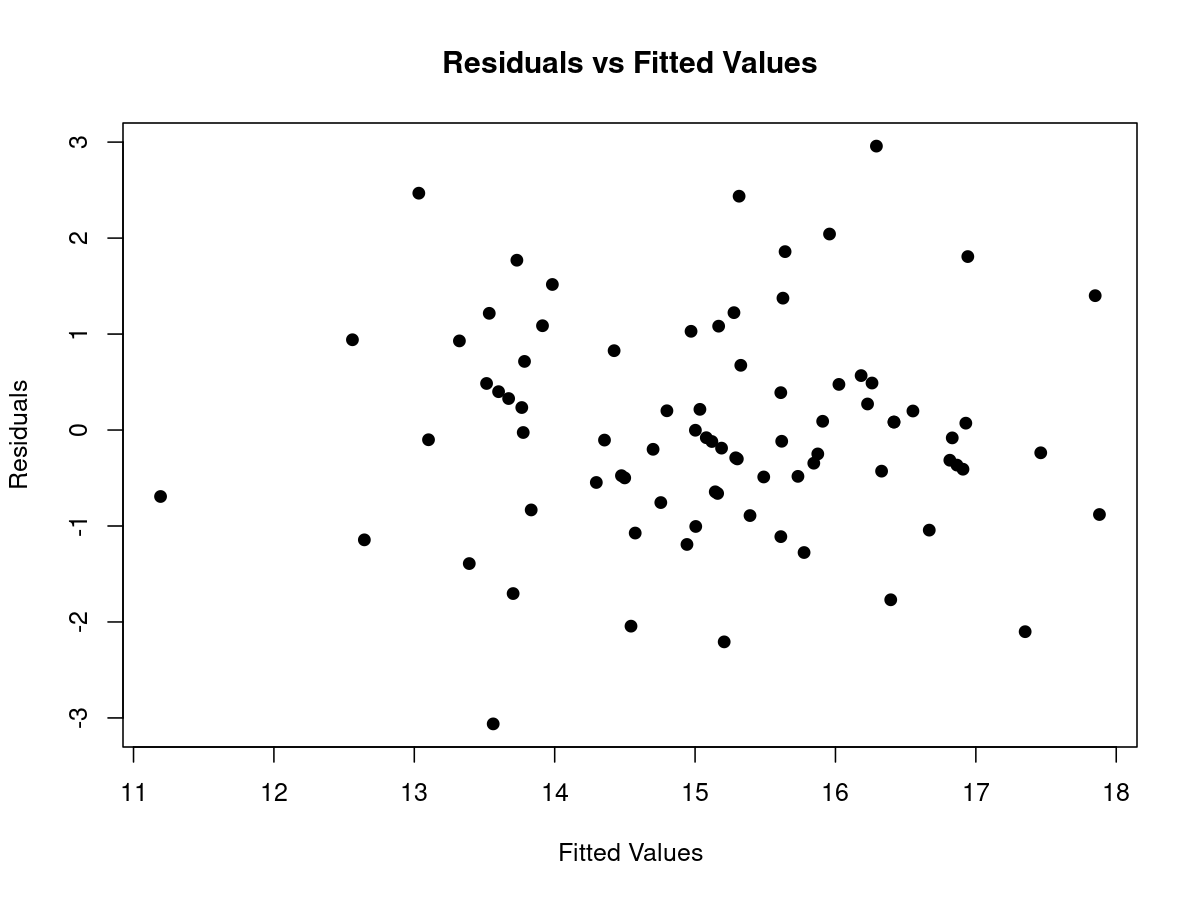

In [14]:
# e part 

#a)comm_model3 <- lm(rental_rates ~ . - vac_rates, df_commercial[-c(6, 62, 80), ])

#summary(comm_model3)

plot(x = comm_model2$fitted.values, y = comm_model2$residuals, pch = 19,
     main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals")

The plot indicates that variance is constant and that the data is normal. A deeper investigation is needed in order to confirm the strength of these assessments.

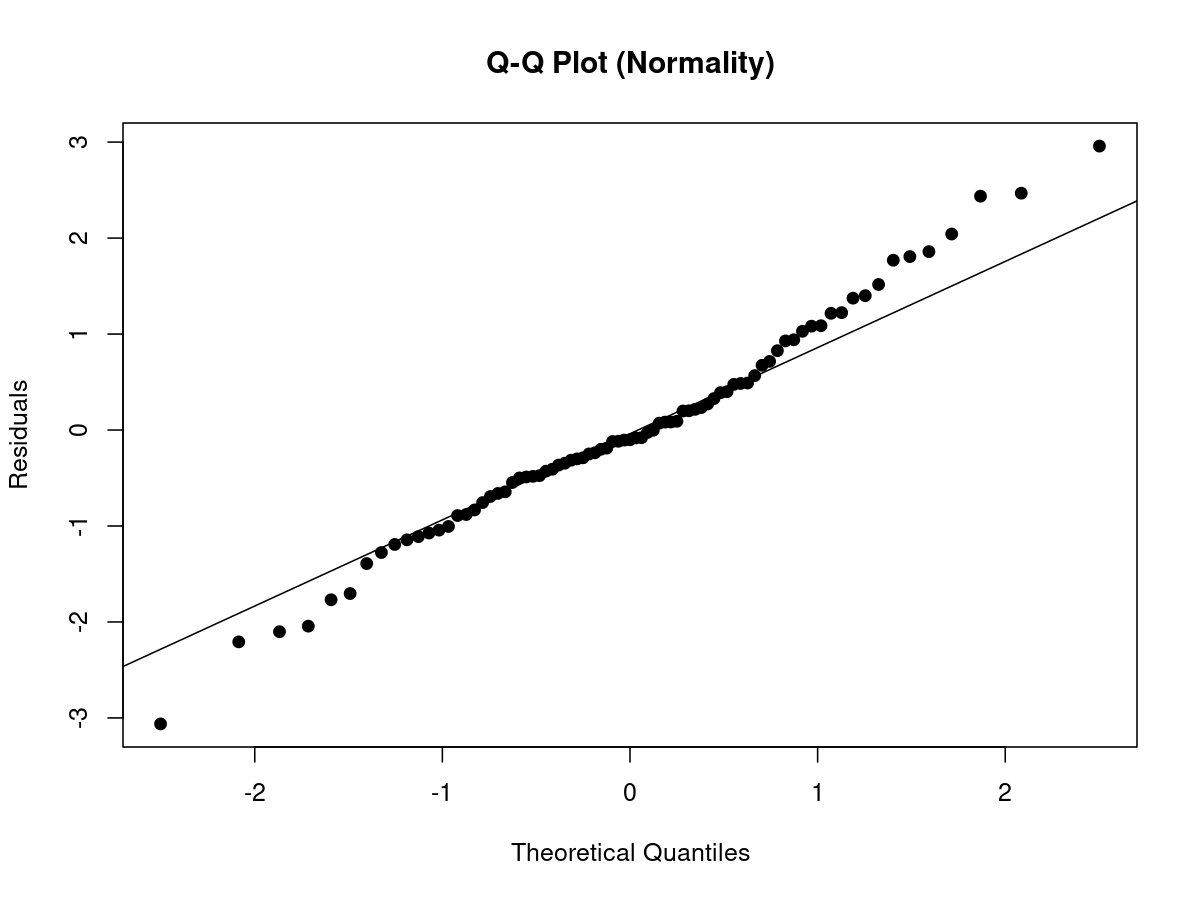

In [15]:
# e part b)
qqnorm(comm_model2$residuals, ylab = "Residuals", main = "Q-Q Plot (Normality)", pch = 19)
qqline(comm_model2$residuals)

The QQ plot shows some diviation from normality. This means that the data was not strictly following a normal distribution.  

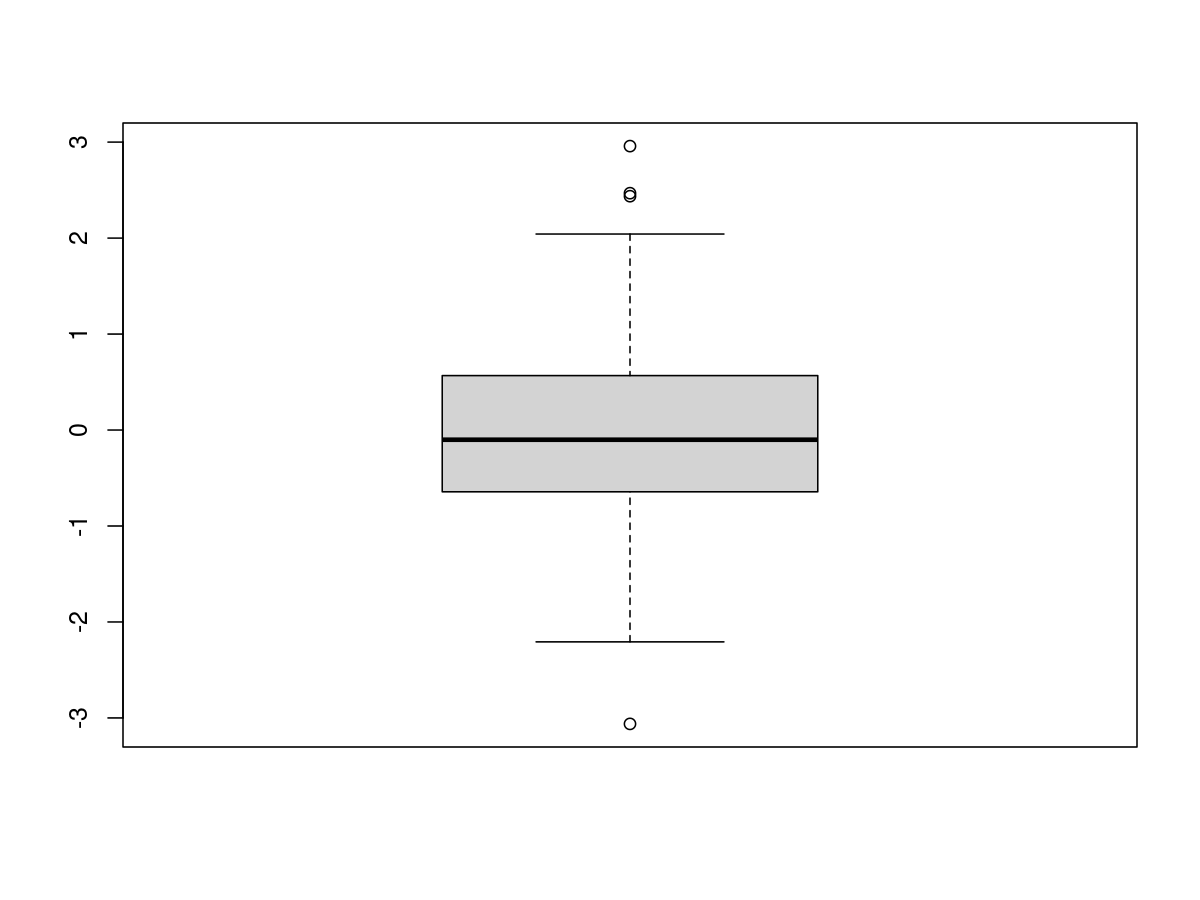

In [16]:
boxplot(comm_model2$residuals)

The boxplot shows a number of outliers at both ends of the distribution. These should be investigated more using specific outlier testing methods.

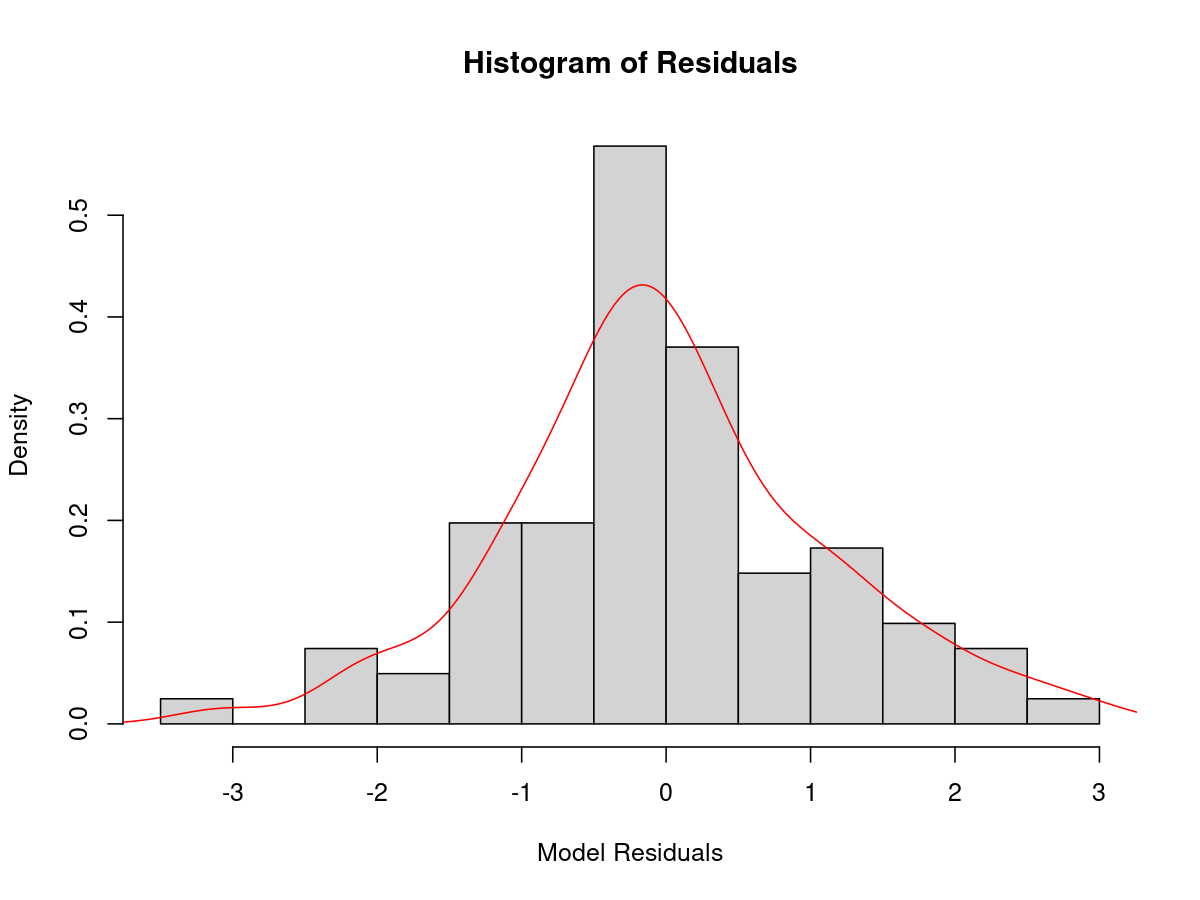

In [17]:
hist(comm_model2$residuals, breaks = 20, xlab = "Model Residuals", main = "Histogram of Residuals", prob = TRUE)
lines(density(comm_model2$residuals), col = "red") 

The histogram shows more evidence for outliers and even some skew in the data.

In [18]:
#e part c)
bptest(comm_model2, studentize = FALSE)


	Breusch-Pagan test

data:  comm_model2
BP = 17.281, df = 3, p-value = 0.0006187


The Breusch-Pagan test results in a small p value. In this case, $H_0$ is that all the variances are equal and $H_A$ is that they are not equal. Here, the null hypothesis can be rejected in favor of the alternate hypothesis.

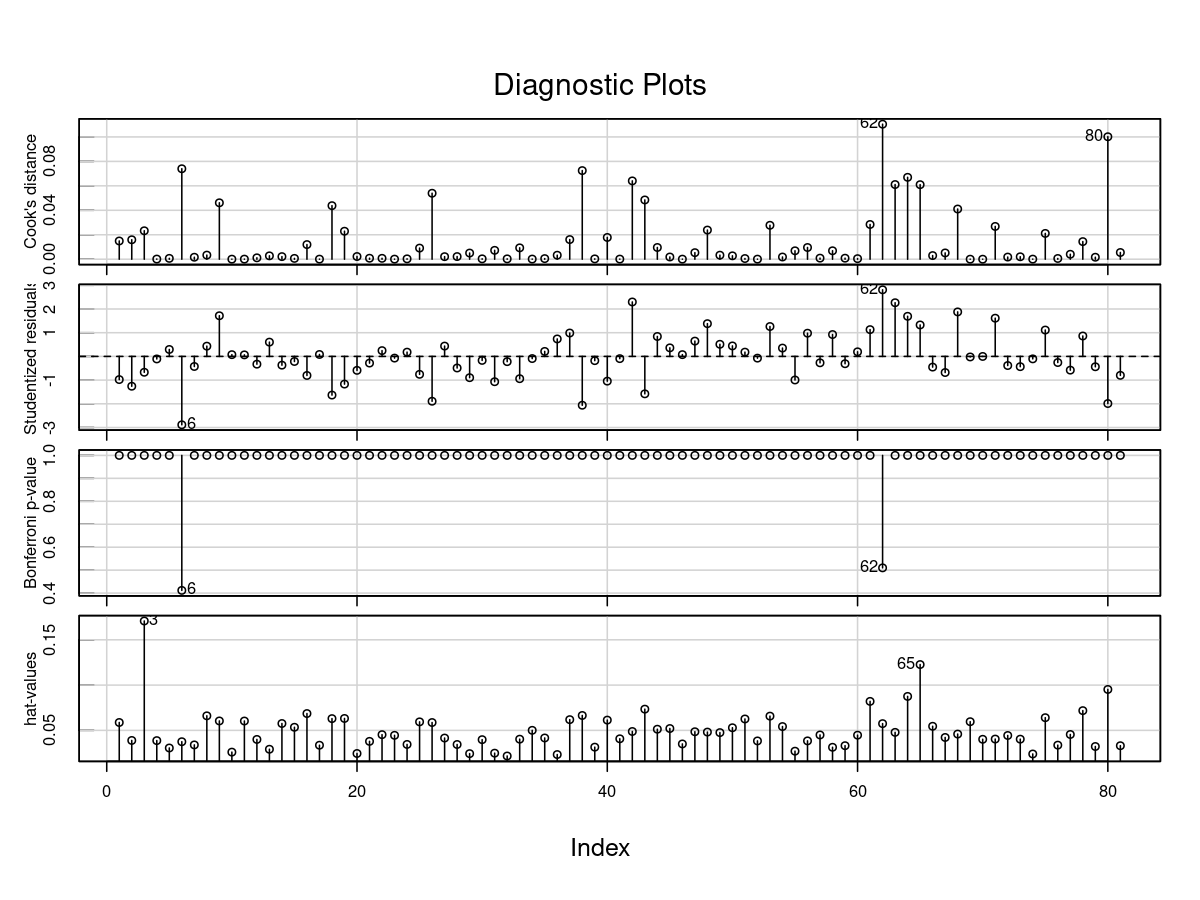

In [19]:
#e part d and g)

influenceIndexPlot(comm_model2)

The diagnostic plots do reveal a few outliers, high leverage, and infuential points. Data points 6 and 62 are outliers, while 3, 62, 65, and 80 indicate high leverage/infuence. 3, 6, 62, and 80 can be dropped from the model. 65 can be left in the model since it is not too much hicher in leverage than the other points.

In [20]:
#e part e and f)

shapiro.test(comm_model2$residuals)
dwtest(comm_model2)


	Shapiro-Wilk normality test

data:  comm_model2$residuals
W = 0.98776, p-value = 0.6406



	Durbin-Watson test

data:  comm_model2
DW = 1.5867, p-value = 0.02463
alternative hypothesis: true autocorrelation is greater than 0


The high p value calculated from the Shapiro-Wilk test, means that we do not have enough evidence to reject the null hypothesis ($H_0$ : the data is normal). This means our assumption of the normality of the data is held true. The Durbin-Watson test indicates that the model errors are correlated ($H_0$: errors are not correlated, $H_A$: They are correlated). The small p value ( < 0.05) means that we have enough evidence to reject the null hypothesis.

In [21]:
# Part F
comm_model3 <- lm(rental_rates ~ . - vac_rates, df_commercial[-c(3, 6, 62, 80), ])

summary(comm_model3)


Call:
lm(formula = rental_rates ~ . - vac_rates, data = df_commercial[-c(3, 
    6, 62, 80), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-2.35002 -0.62221 -0.04052  0.62566  2.24922 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.239e+01  4.716e-01  26.261  < 2e-16 ***
age          -1.239e-01  1.987e-02  -6.236 2.62e-08 ***
opp_expenses  2.571e-01  5.487e-02   4.685 1.27e-05 ***
tot_squft     7.957e-06  1.236e-06   6.438 1.12e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.01 on 73 degrees of freedom
Multiple R-squared:  0.5778,	Adjusted R-squared:  0.5605 
F-statistic: 33.31 on 3 and 73 DF,  p-value: 1.13e-13


By dropping outliers, $R^2$ values did not improve in the new model. They actually dropped slightly, indicating that outliers might not have had a strong effect on the model after all.

In [22]:
comm_model4 <- lm(rental_rates ~ . - vac_rates, df_commercial[-c(6, 62, 80), ])

summary(comm_model4)


Call:
lm(formula = rental_rates ~ . - vac_rates, data = df_commercial[-c(6, 
    62, 80), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-2.29323 -0.62754 -0.04509  0.58356  2.32591 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.224e+01  4.432e-01  27.626  < 2e-16 ***
age          -1.291e-01  1.899e-02  -6.796 2.36e-09 ***
opp_expenses  2.739e-01  5.148e-02   5.320 1.06e-06 ***
tot_squft     8.003e-06  1.233e-06   6.491 8.62e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.008 on 74 degrees of freedom
Multiple R-squared:  0.6203,	Adjusted R-squared:  0.6049 
F-statistic:  40.3 on 3 and 74 DF,  p-value: 1.515e-15


Leaving data point 3 in the model improved the $R^2$ values a little. 

In [23]:
comm_model5 <- lm(rental_rates ~ . - vac_rates, df_commercial[-c(6, 62), ])

summary(comm_model5)


Call:
lm(formula = rental_rates ~ . - vac_rates, data = df_commercial[-c(6, 
    62), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-2.15356 -0.66614 -0.08314  0.63095  2.34999 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.226e+01  4.521e-01  27.121  < 2e-16 ***
age          -1.283e-01  1.937e-02  -6.625 4.65e-09 ***
opp_expenses  2.804e-01  5.241e-02   5.350 9.22e-07 ***
tot_squft     7.296e-06  1.206e-06   6.050 5.26e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.029 on 75 degrees of freedom
Multiple R-squared:  0.5995,	Adjusted R-squared:  0.5834 
F-statistic: 37.42 on 3 and 75 DF,  p-value: 6.844e-15


Removing outliers and ignoring high leverage also improved the model slightly as can be seen by the higher $R^2$ values.

In [24]:
# G 
single_unit <- tibble(age = 5, opp_expenses = 8.25, vac_rates = 0, tot_squft = 250000)

predict(comm_model5, newdata = single_unit, level = 0.90, interval = "prediction")

,fit,lwr,upr
1,15.75576,14.01053,17.50099
